In [252]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import shutil
%matplotlib inline

In [253]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dineshmanikanta/machine-failure-predictions")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tanmi\.cache\kagglehub\datasets\dineshmanikanta\machine-failure-predictions\versions\1


In [254]:
df = pd.read_csv("machine failure.csv")
df.head(4)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0


In [255]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

c:\Users\tanmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tanmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

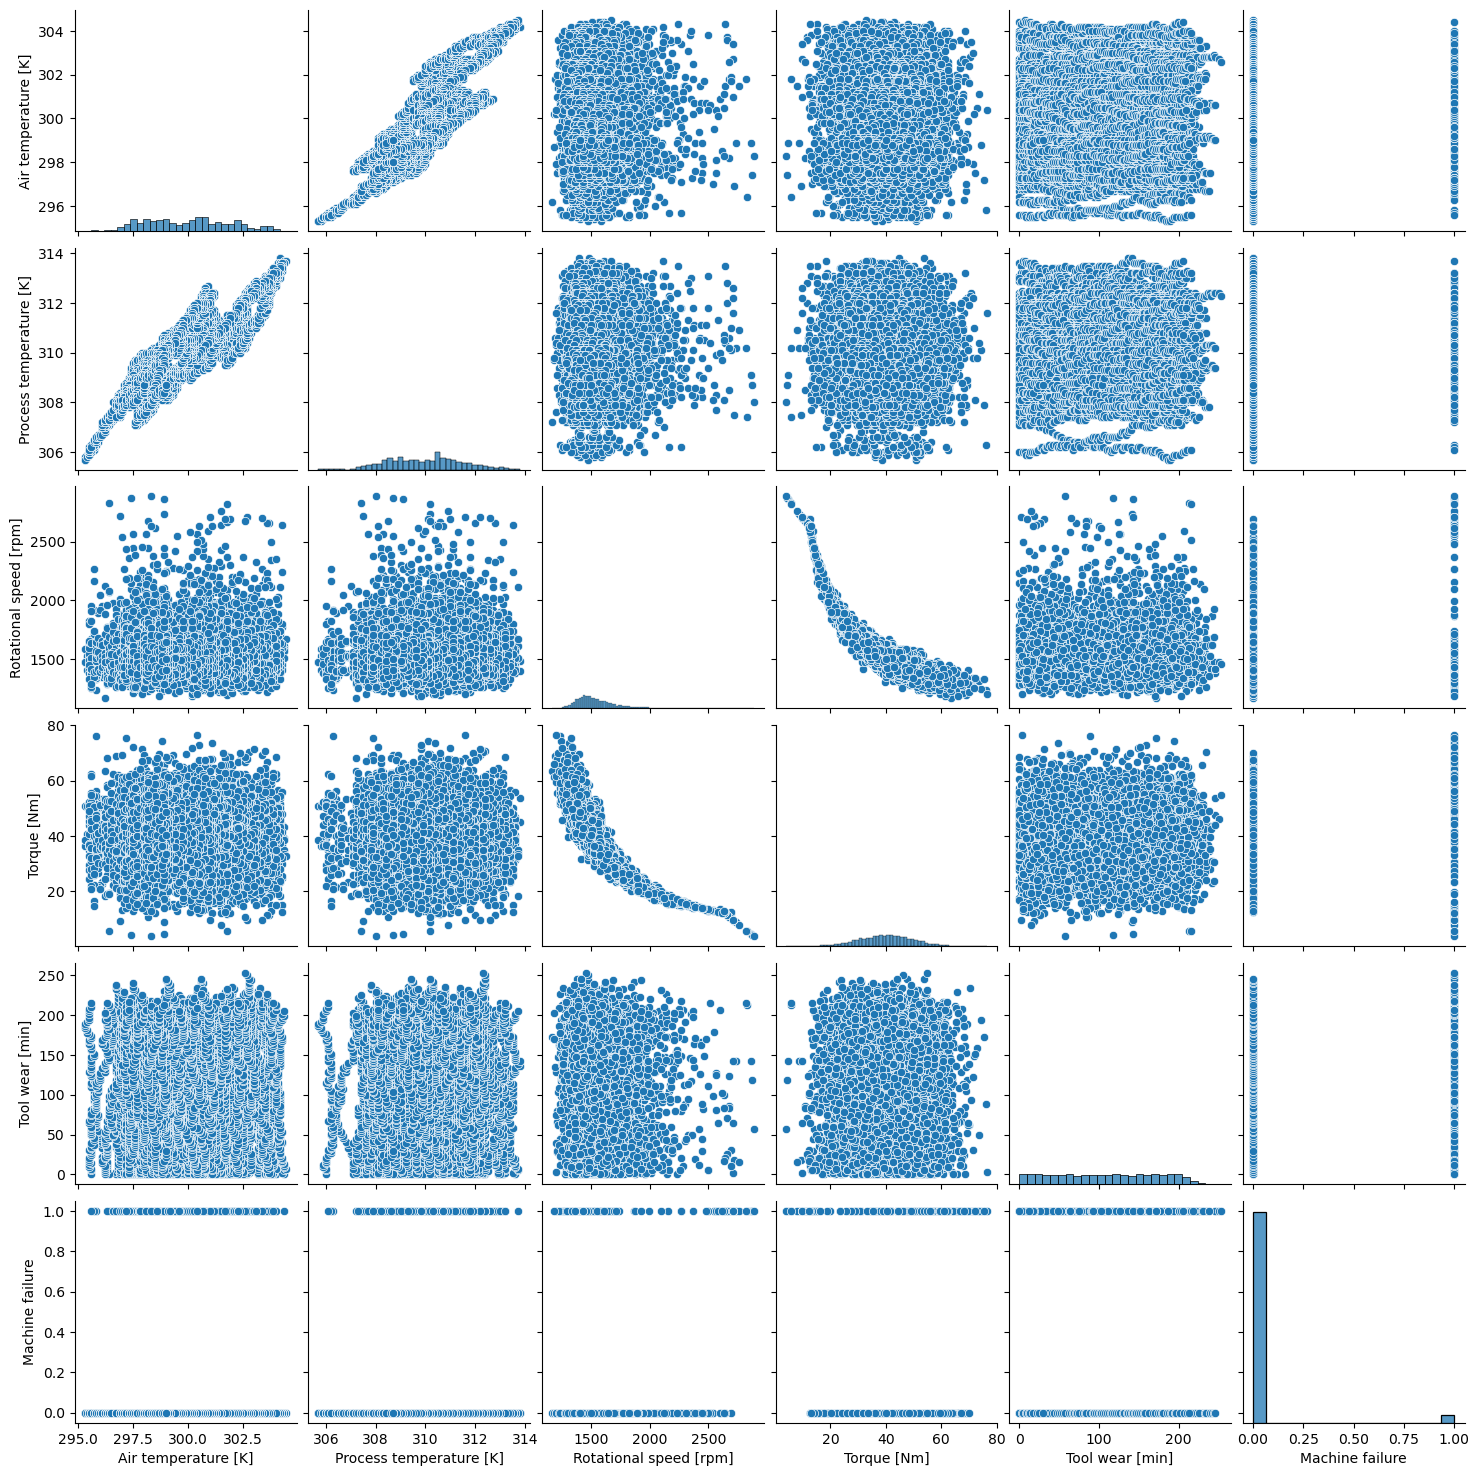

In [257]:
sns.pairplot(df.drop(columns=["UDI","TWF","HDF","PWF","OSF","RNF"])) 

<Axes: xlabel='Torque [Nm]', ylabel='Machine failure'>

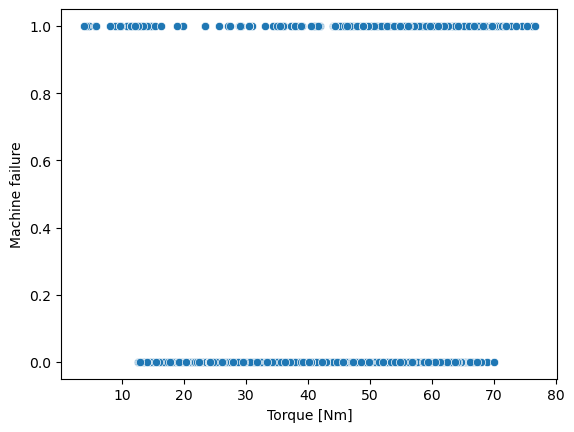

In [258]:
sns.scatterplot(df,x="Torque [Nm]", y="Machine failure")

<Axes: xlabel='Rotational speed [rpm]', ylabel='Machine failure'>

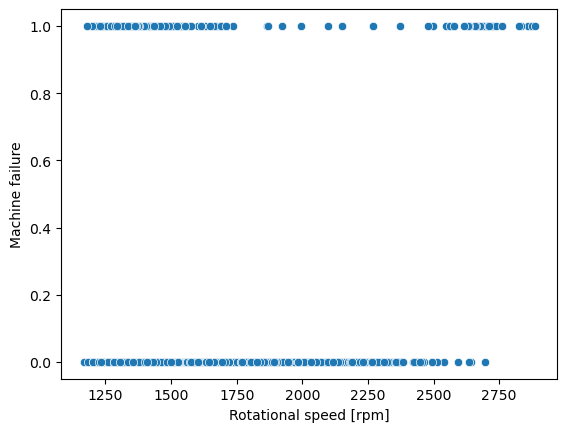

In [259]:
sns.scatterplot(df,x="Rotational speed [rpm]", y="Machine failure")


<Axes: xlabel='Process temperature [K]', ylabel='Machine failure'>

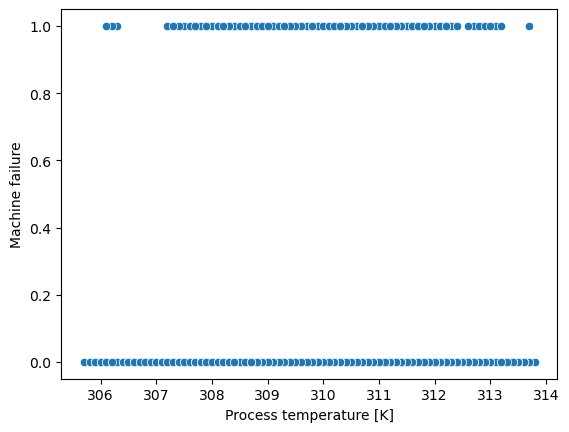

In [260]:
sns.scatterplot(df,x="Process temperature [K]", y="Machine failure")

In [261]:
df.drop(columns=["UDI","Product ID"],inplace=True,axis=1)
df.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0


In [262]:
#look into the "Type" variable since it's a string and has multiple unique values
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [263]:
# create dummmy variables of true and fault
df_type = pd.get_dummies(df["Type"], prefix="Type")
df_type.head(2)

,Type_H,Type_L,Type_M
0,False,False,True
1,False,True,False


In [264]:
#merge the main df with the dummy variables
df = pd.merge(df,df_type,left_index=True,right_index=True)
df.drop(columns=["Type"],inplace=True,axis=1)
df.head(2)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,False,True
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,False,True,False


In [265]:
#convert bool-variable to interger
df["Type_H"] = df["Type_H"].apply(lambda x: 1 if x == True else 0)
df["Type_L"] = df["Type_L"].apply(lambda x: 1 if x == True else 0)
df["Type_M"] = df["Type_M"].apply(lambda x: 1 if x == True else 0)

In [266]:
#check the data frame
df.head(2)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,1,0


In [267]:
df["Machine failure"].isna().sum()

0

In [268]:
#import library to split data
from sklearn.model_selection import train_test_split

In [269]:
#define feature "X" and result "y" from the dataframe
X = df.drop(columns=["Machine failure"])
y = df["Machine failure"]

In [270]:
#split data to training set and test set
X_train, X_test_all, y_train, y_test_all = train_test_split(X, y, test_size=0.4, random_state=101)

In [271]:
#split the test data to cross validation set and test set
X_test, X_cv, y_test, y_cv = train_test_split(X_test_all, y_test_all, test_size=0.5, random_state=101)

In [272]:
#import libraries for machine learning
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2

In [273]:
#standard NN model
model = Sequential(
    [
        Dense(units = 13, activation= "relu"),
        Dense(units = 6, activation= "relu"),
        Dense(units = 3, activation= "relu"),
        Dense(units = 1, activation= "sigmoid")
    ]
)

model.compile(loss= BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001))

model.fit(X_train,y_train,
        epochs=50,validation_data=(X_cv,y_cv))

Epoch 1/50
188/188 [==============================] - 2s 3ms/step - loss: 26.4895 - val_loss: 0.5819
Epoch 2/50
188/188 [==============================] - 0s 2ms/step - loss: 0.5150 - val_loss: 0.5636
Epoch 3/50
188/188 [==============================] - 0s 3ms/step - loss: 0.4964 - val_loss: 0.5421
Epoch 4/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4778 - val_loss: 0.5136
Epoch 5/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4515 - val_loss: 0.4828
Epoch 6/50
188/188 [==============================] - 0s 2ms/step - loss: 0.4240 - val_loss: 0.4480
Epoch 7/50
188/188 [==============================] - 0s 2ms/step - loss: 0.3951 - val_loss: 0.4103
Epoch 8/50
188/188 [==============================] - 0s 2ms/step - loss: 0.3622 - val_loss: 0.3719
Epoch 9/50
188/188 [==============================] - 0s 2ms/step - loss: 0.3292 - val_loss: 0.3320
Epoch 10/50
188/188 [==============================] - 0s 2ms/step - loss: 0.2980 - val_loss: 0.294

<Axes: >

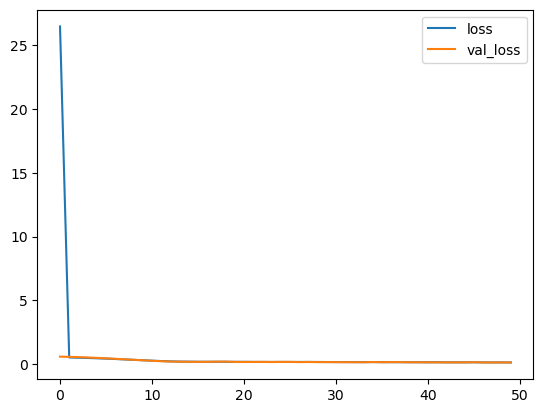

In [274]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<Axes: >

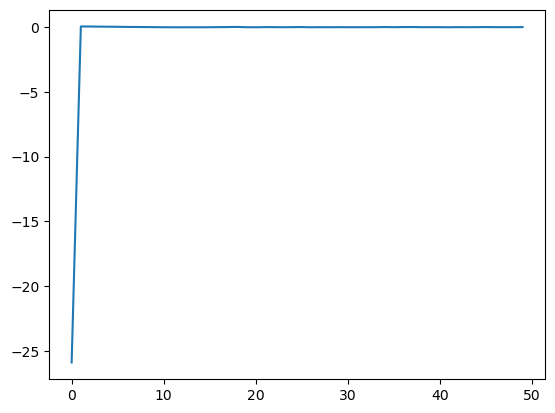

In [275]:
(losses["val_loss"]- losses["loss"]).plot()

In [276]:
predictions = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [277]:
print(predictions.shape)

(2000, 1)


In [278]:
print(y_test.shape)

(2000,)


In [279]:
predictions = predictions.flatten() 
print(predictions.shape)

(2000,)


In [280]:
predictions = pd.Series(predictions)

In [281]:
y_test = y_test.reset_index()
y_test.head()

,index,Machine failure
0,5284,0
1,9170,0
2,842,0
3,8390,0
4,5605,0


In [282]:
type(predictions)

pandas.core.series.Series

In [283]:
result = pd.DataFrame({"test": y_test["Machine failure"], "predictions" : predictions})
result.head()

,test,predictions
0,0,0.039277
1,0,0.081329
2,0,0.072297
3,0,0.031693
4,0,0.040691


In [ ]:
sns.scatterplot()

In [284]:
from sklearn.metrics import classification_report,confusion_matrix

In [291]:
result["predictions"] = result["predictions"].apply(lambda x: 1 if x >= 0.1 else 0) 

<Axes: >

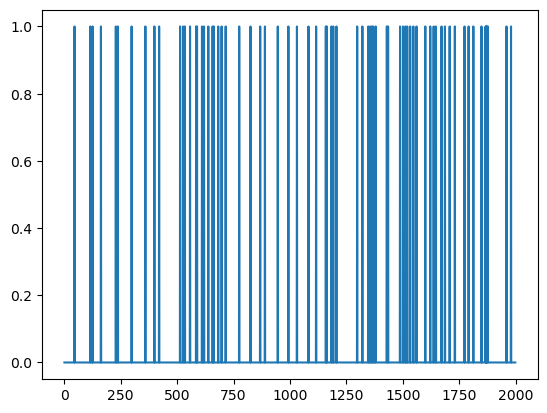

In [293]:
result["predictions"].plot()

In [296]:
result["predictions"].value_counts()

predictions
0    1926
1      74
Name: count, dtype: int64

In [297]:
y_test["Machine failure"].value_counts()

Machine failure
0    1913
1      87
Name: count, dtype: int64

<Axes: >

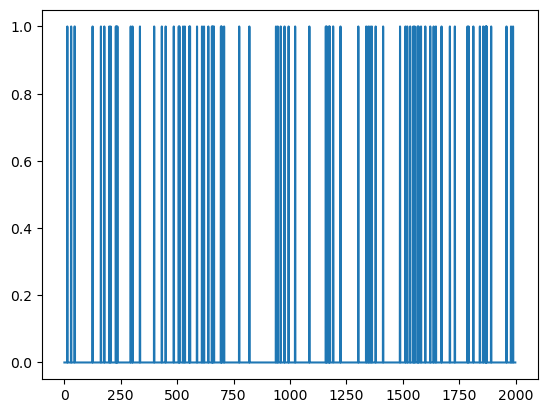

In [289]:
y_test["Machine failure"].plot()

In [294]:
print(classification_report(y_test["Machine failure"],result["predictions"]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1913
           1       0.55      0.47      0.51        87

    accuracy                           0.96      2000
   macro avg       0.77      0.73      0.74      2000
weighted avg       0.96      0.96      0.96      2000



In [295]:
print(confusion_matrix(y_test["Machine failure"],result["predictions"]))

[[1880   33]
 [  46   41]]


In [ ]:
print(confusion_matrix(y_test["Machine failure"],result["predictions"]))